In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
#Districts of kerala and the population
Dist =['Alappuzha','Ernakulam','Idukki','Kannur','Kasaragod','Kollam','Kottayam','Kozhikode','Malappuram','Palakkad','Pathanamthitta','Thiruvananthapuram','Thrissur','Wayanad']
Pop = [2210134,3409416,1151891,2620643,1357970,2737364,2050966,3205733,4272090,2918678,1243752,3429192,3241990,849054]

#Espop list contains population numbers for each country expressed in millions.
Espop = []
for number in Pop:
    Espop.append(number / 1000000)
# Create dictionary my_dict with three key
kerala = {'District':Dist,'Estimated_Population':Pop ,'pop':Espop}
#Create dataframe 
ker = pd.DataFrame(kerala)

In [3]:
ker.head()

,District,Estimated_Population,pop
0,Alappuzha,2210134,2.210134
1,Ernakulam,3409416,3.409416
2,Idukki,1151891,1.151891
3,Kannur,2620643,2.620643
4,Kasaragod,1357970,1.357970


In [4]:
np_pop = Espop*2

In [5]:
District=['Ernakulam','Kollam','Alappuzha','Thiruvananthapuram','Kottayam','Thrissur','Idukki','Kannur','Kozhikode','Kasaragod','Pathanamthitta','Palakkad','Wayanad','Malappuram']
Per_capita_income =[251104,247014,234857,223741,218837,213799,207665,190684,186660,17291,171075,166412,164099,154463]


In [6]:
#url to wikipedia page
url1 = 'https://en.wikipedia.org/wiki/List_of_districts_and_cities_in_Kerala_by_GDP_per_capita'

In [7]:
s = requests.Session()
response = s.get(url1,timeout=10)
response

<Response [200]>

In [8]:
#Get title of page
soup = BeautifulSoup(response.text, 'html.parser')
soup.title.string

'List of districts and cities in Kerala by GDP per capita - Wikipedia'

In [9]:
#Get tables from wikipiedia page
tables = soup.find_all('table',{"class":"wikitable sortable"})


In [10]:
#Scrap data 
c1 =[]
c2 =[]
c3 =[]
for row in tables[1].findAll('tr'):
    cells = row.findAll('td')
    #print(len(cells))
    if len(cells)==3:
        #print(cells[3].find(text=True))
        
        c1.append((cells[0].find(text=True)).strip()) # strip to remove /n from row 
        c2.append(cells[1].find('a').text)
        c3.append((cells[2].find(text=True)).strip()) #strip to remove /n from row 


In [11]:
print(c2[0])

Ernakulam


In [12]:
# extract the column names
column_names = [item.get_text() for item in tables[1].find_all('th')]


In [13]:
print(column_names)

['Rank\n', 'District\n', 'Per capita income in Rs.\n']


In [14]:
#Remove \n
header = [elem.strip() for elem in column_names]
print(header)

['Rank', 'District', 'Per capita income in Rs.']


In [15]:
#Create a dictionary
d = dict([(x,0)for x in header])
d

{'Rank': 0, 'District': 0, 'Per capita income in Rs.': 0}

In [16]:
d['Rank'] =c1
d['District'] = c2
d['Per capita income in Rs.']=c3

In [17]:
df = pd.DataFrame(d)

In [18]:
df.head(15)

,Rank,District,Per capita income in Rs.
0,1,Ernakulam,"251,104"
1,2,Kollam,"247,014"
2,3,Alappuzha,"234,857"
3,4,Thiruvananthapuram,"223,741"
4,5,Kottayam,"218,837"
5,6,Thrissur,"213,799"
6,7,Idukki,"207,665"
7,8,Kannur,"190,684"
8,9,Kozhikode,"186,660"
9,10,Kasaragod,"172,691"


In [19]:
#https://dashboard.kerala.gov.in/covid/dailyreporting-view-public-districtwise.php

Covid_Confirmed =[298986,554452,130250,133134,495715,365235,256683,297042,546143,355253,176434,483598,421571,115392]
District=['Alappuzha','Ernakulam','Idukki','Kasaragod','Kozhikode','Kollam','Kannur','Kottayam','Malappuram','Palakkad','Pathanamthitta','Thrissur','Thiruvananthapuram','Wayanad']
kerala_covid = {'District':District,'Covid_Cases':Covid_Confirmed}
df2 = pd.DataFrame(kerala_covid)

In [20]:
df2.head(15)

,District,Covid_Cases
0,Alappuzha,298986
1,Ernakulam,554452
2,Idukki,130250
3,Kasaragod,133134
4,Kozhikode,495715
5,Kollam,365235
6,Kannur,256683
7,Kottayam,297042
8,Malappuram,546143
9,Palakkad,355253


In [21]:
#Merge both data frames 
data = pd.merge(df, df2, on ='District')

In [22]:
data = pd.merge(data,ker,on ='District')

In [23]:
data.head(15)

,Rank,District,Per capita income in Rs.,Covid_Cases,Estimated_Population,pop
0,1,Ernakulam,"251,104",554452,3409416,3.409416
1,2,Kollam,"247,014",365235,2737364,2.737364
2,3,Alappuzha,"234,857",298986,2210134,2.210134
3,4,Thiruvananthapuram,"223,741",421571,3429192,3.429192
4,5,Kottayam,"218,837",297042,2050966,2.050966
5,6,Thrissur,"213,799",483598,3241990,3.241990
6,7,Idukki,"207,665",130250,1151891,1.151891
7,8,Kannur,"190,684",256683,2620643,2.620643
8,9,Kozhikode,"186,660",495715,3205733,3.205733
9,10,Kasaragod,"172,691",133134,1357970,1.357970


In [24]:
data.rename(columns = {'Per capita income in Rs.':'PerCapIncome'}, inplace = True)

In [25]:
data.dtypes

Rank                     object
District                 object
PerCapIncome             object
Covid_Cases               int64
Estimated_Population      int64
pop                     float64
dtype: object

# EDA on Covid cases and population

<AxesSubplot:xlabel='Covid_Cases', ylabel='District'>

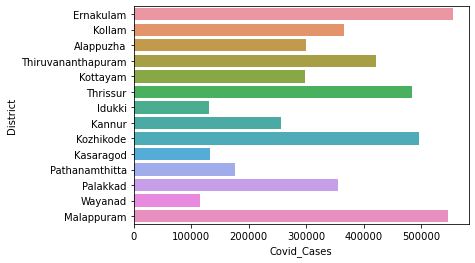

In [26]:
sns.barplot(x=data.Covid_Cases, y=data.District)


<AxesSubplot:xlabel='Estimated_Population', ylabel='District'>

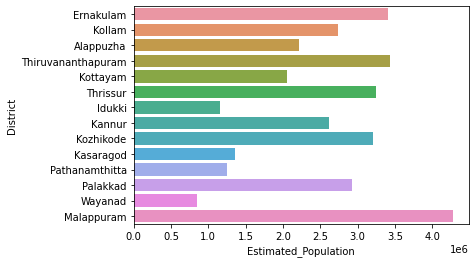

In [27]:
sns.barplot(x=data.Estimated_Population, y=data.District)

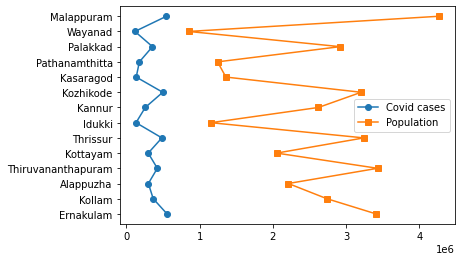

In [28]:
#plt.plot(data.District,data.Covid_Cases)
plt.plot(data.Covid_Cases,data.District,label="Covid cases",marker='o')
plt.plot(data.Estimated_Population,data.District,label="Population",marker='s')
plt.legend()
plt.show()

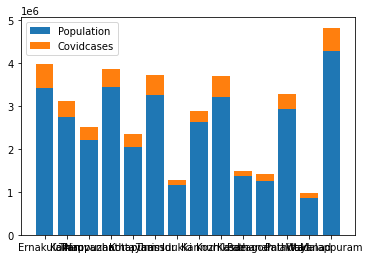

In [29]:
#plt.rcParams["figure.figsize"] = (25,3)
plt.bar(data.District,data.Estimated_Population,label="Population")
plt.bar(data.District,data.Covid_Cases,bottom=data.Estimated_Population,label ="Covidcases")
plt.legend()
plt.show()

In [30]:
#Add column to find the percentage of covid cases with population
data['CasesbyPop']= data['Covid_Cases']/data['Estimated_Population']

<AxesSubplot:xlabel='CasesbyPop', ylabel='District'>

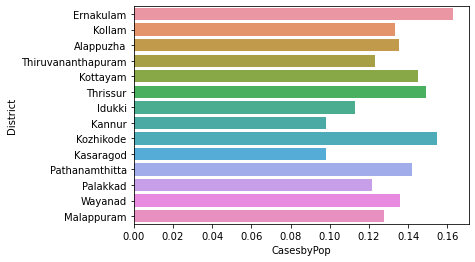

In [31]:
sns.barplot(x=data.CasesbyPop, y=data.District)

<AxesSubplot:xlabel='District', ylabel='CasesbyPop'>

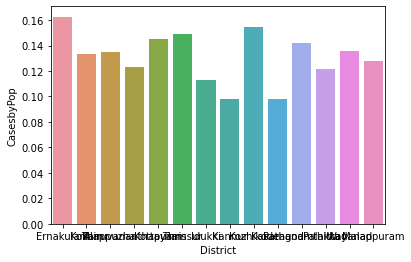

In [32]:
sns.barplot(x=data.District, y=data.CasesbyPop)

In [33]:
data = data.sort_values('CasesbyPop',ascending=False)

Text(0.5, 1.0, 'Covid Spread Percentage in Kerala Sep2021')

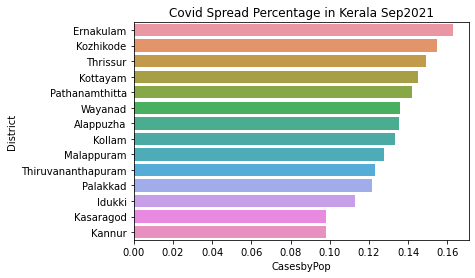

In [34]:
sns.barplot(x=data.CasesbyPop, y=data.District)

plt.title("Covid Spread Percentage in Kerala Sep2021")

In [35]:
data.head(15)

,Rank,District,PerCapIncome,Covid_Cases,Estimated_Population,pop,CasesbyPop
0,1,Ernakulam,"251,104",554452,3409416,3.409416,0.162624
8,9,Kozhikode,"186,660",495715,3205733,3.205733,0.154634
5,6,Thrissur,"213,799",483598,3241990,3.241990,0.149167
4,5,Kottayam,"218,837",297042,2050966,2.050966,0.144830
10,11,Pathanamthitta,"171,075",176434,1243752,1.243752,0.141856
12,13,Wayanad,"164,099",115392,849054,0.849054,0.135907
2,3,Alappuzha,"234,857",298986,2210134,2.210134,0.135280
1,2,Kollam,"247,014",365235,2737364,2.737364,0.133426
13,14,Malappuram,"154,463",546143,4272090,4.272090,0.127840
3,4,Thiruvananthapuram,"223,741",421571,3429192,3.429192,0.122936


In [36]:
data.sort_values(['PerCapIncome','Covid_Cases','Estimated_Population'])

,Rank,District,PerCapIncome,Covid_Cases,Estimated_Population,pop,CasesbyPop
13,14,Malappuram,"154,463",546143,4272090,4.272090,0.127840
12,13,Wayanad,"164,099",115392,849054,0.849054,0.135907
11,12,Palakkad,"166,412",355253,2918678,2.918678,0.121717
10,11,Pathanamthitta,"171,075",176434,1243752,1.243752,0.141856
9,10,Kasaragod,"172,691",133134,1357970,1.357970,0.098039
8,9,Kozhikode,"186,660",495715,3205733,3.205733,0.154634
7,8,Kannur,"190,684",256683,2620643,2.620643,0.097947
6,7,Idukki,"207,665",130250,1151891,1.151891,0.113075
5,6,Thrissur,"213,799",483598,3241990,3.241990,0.149167
4,5,Kottayam,"218,837",297042,2050966,2.050966,0.144830


### Remove comma from PerCapIncome and change the data type to int

In [37]:
data.replace(',','', regex=True, inplace=True)

In [38]:
data.dtypes

Rank                     object
District                 object
PerCapIncome             object
Covid_Cases               int64
Estimated_Population      int64
pop                     float64
CasesbyPop              float64
dtype: object

In [39]:
#Change data type to int
data['PerCapIncome'] = data['PerCapIncome'].astype(int)

In [40]:
data.dtypes

Rank                     object
District                 object
PerCapIncome              int32
Covid_Cases               int64
Estimated_Population      int64
pop                     float64
CasesbyPop              float64
dtype: object

In [41]:
#Add colors by creating a dictionarry
d= {
    'Alappuzha':'red','Ernakulam':'black','Idukki':'blue','Kannur':'yellow','Kasaragod':'purple','Kozhikode':'cyan',
    'Kollam':'olive','Kannur':'brown','Kottayam':'green','Malappuram':'gray','Palakkad':'magenta','Pathanamthitta':'navy',
    'Thrissur':'lime','Thiruvananthapuram':'gold','Wayanad':'coral'
}
# Add column col with appropriate color mapping to cont
data['color'] = data['District'].map(d)

In [42]:
data.head()

,Rank,District,PerCapIncome,Covid_Cases,Estimated_Population,pop,CasesbyPop,color
0,1,Ernakulam,251104,554452,3409416,3.409416,0.162624,black
8,9,Kozhikode,186660,495715,3205733,3.205733,0.154634,cyan
5,6,Thrissur,213799,483598,3241990,3.241990,0.149167,lime
4,5,Kottayam,218837,297042,2050966,2.050966,0.144830,green
10,11,Pathanamthitta,171075,176434,1243752,1.243752,0.141856,navy


Text(0.5, 1.0, 'Covid cases in kerala ')

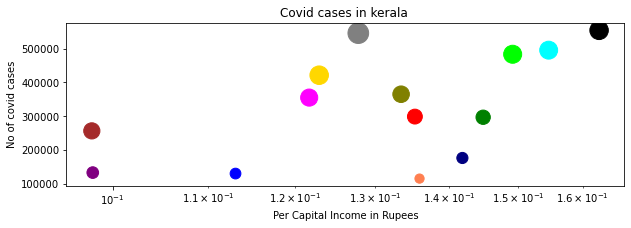

In [47]:
import matplotlib.colors as mcolors
# Specify c and alpha inside plt.scatter()
plt.rcParams["figure.figsize"] = (10,3)
np_pop = data['pop']
np_pop = np_pop*100
plt.scatter(x = data['CasesbyPop'], y = data.Covid_Cases,s =np_pop,c=data.color)
plt.xscale('log')
plt.xlabel('Per Capital Income in Rupees')
plt.ylabel('No of covid cases')
plt.title('Covid cases in kerala ')


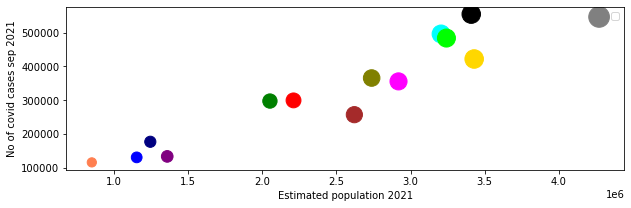

In [44]:
scatter = plt.scatter(x = data.Estimated_Population, y = data.Covid_Cases,s =np_pop,c=data.color)
plt.legend(*scatter.legend_elements())

plt.xlabel('Estimated population 2021')
plt.ylabel('No of covid cases sep 2021')
plt.show()

In [48]:
 #Find a correlation matric for gdp  ,population to covid cases
col = data[['PerCapIncome','Covid_Cases','Estimated_Population']]

In [49]:
col1 = ['PerCapIncome','Covid_Cases','Estimated_Population']

In [50]:
#min max scale , default range is between o to 1
scaled = preprocessing.MinMaxScaler()

In [51]:
scaled_data = scaled.fit_transform(col)

In [52]:
scaled_data = pd.DataFrame(scaled_data , columns =['PerCapIncome','Covid_Cases','Estimated_Population'])

In [53]:
scaled_data.head()

,PerCapIncome,Covid_Cases,Estimated_Population
0,1.000000,1.000000,0.747980
1,0.333161,0.866221,0.688476
2,0.613984,0.838623,0.699068
3,0.666115,0.413725,0.351125
4,0.171894,0.139029,0.115306


In [54]:
#Correlation matrix 
correlation = scaled_data.corr()

In [55]:
correlation["Covid_Cases"].sort_values(ascending=False)*100

Covid_Cases             100.000000
Estimated_Population     94.926599
PerCapIncome             29.882410
Name: Covid_Cases, dtype: float64

In [56]:
correlation["PerCapIncome"].sort_values(ascending=False)*100

PerCapIncome            100.000000
Covid_Cases              29.882410
Estimated_Population     19.087288
Name: PerCapIncome, dtype: float64

<AxesSubplot:title={'center':'Correlation of Population and Percapital income with covid cases'}>

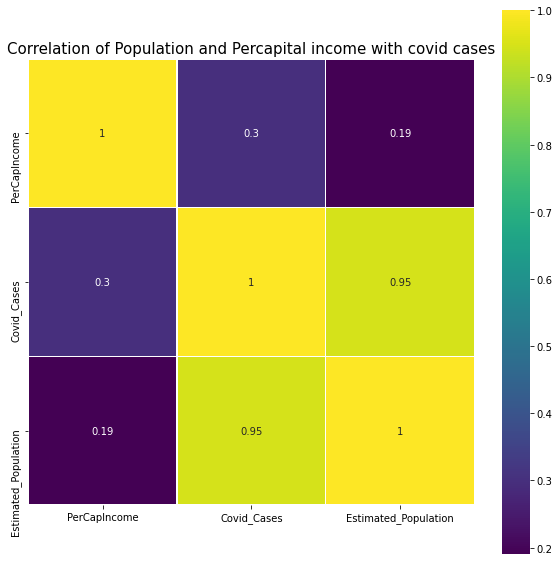

In [58]:
plt.figure(figsize=(10,10))
plt.title("Correlation of Population and Percapital income with covid cases", y=1, size=15)
sns.heatmap(correlation ,annot=True,square= True,cmap='viridis', vmax=1 ,linewidths=.5)